## Notebook es9

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

## 09.1

### Assignment

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- 34 cities randomly placed **on** a circumference
- 34 cities randomly placed **inside** a square

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path in cartesian coordinates

### Solution 

The Traveling Salesman Problem, in a system that present 34 cities, present a huge number of different possibilities. In order to quickly find a good estimate for the solution, Genetic algorithms can be exploited. This type of algorithm allows rapid exploration of a huge number of different possibilities an helps find the best candidate for the solution. 

This type of algorithm simulates evolutionary effects on a population of possible solutions: every element of the population can evolve with random mutations or crossover with another elements of the population. Obviously, the best candidates in the system have a lower probability of changing their characteristics. 

In this way, after some step of the simulation, the system finds many different possible configurations, preserving the best candidates for the final solution.

To implement this type of algorithm, I first needed to codify the problem in a simple way. As suggested in the assignment, I rapresented the sequence of visited cities as an ordered vector where the different numbers indicate the different cities in the system. I created a new class called ```travel```, which contains the ordered vector and methods to perform the random mutation described in the assignment. Each element of ```travel``` also has a fitness parameter that quantifies the quality of the travel. 

Then I created another class called ```population```, which contains a field of travel objects that allows to rapresente the evolution of the population. The principal function of this class is ```evolution()```, where the elements of the system are modified randomly with mutation and crossover. In this class, the elements of the population are ordered by their fitness value, these feature allows identification of best candidates for the solution of the problem. 

I use this code to estimate the best travel to visit 34 cities randomly placed on a circumference and 34 cities randomly placed inside a square. The code perform $500$ evolutionary steps in a population of $200$ objects. The probabilities to effectuate the mutation are:
- Random permutation: $10 \%$ 
- Random shift: $10 \%$ 
- Random multi permutation: $10 \%$ 
- Random inversion: $10 \%$ 
- Crossover: $50 \%$ 

I obtain $L_{circle} \simeq 6.23$ and $L_{square} \simeq 4.80$. The evolution of $L_{best}$ in both cases shows that the estimate varies significantly in the first step, and then it stabilizes after about $300$ steps. 

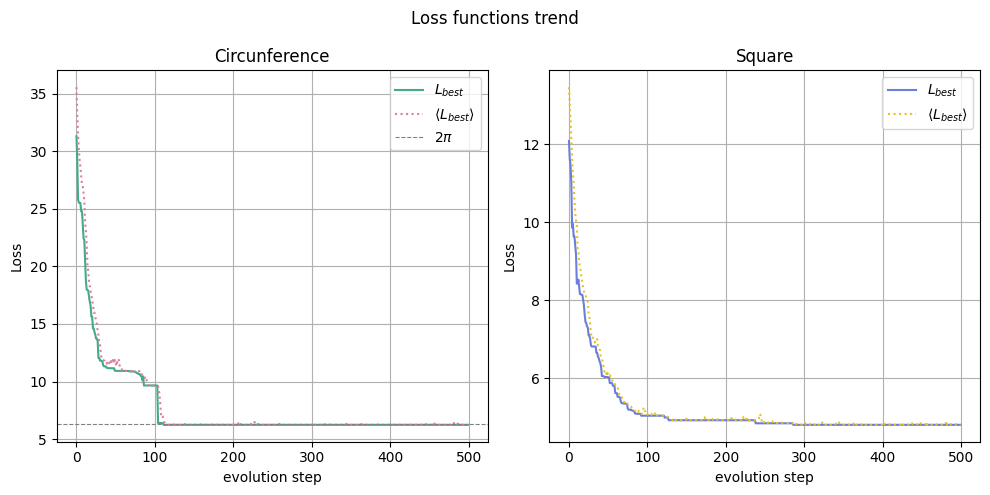

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#load data
circle_dist = np.loadtxt('data/circle_dist.dat')
circle_dist_ave = np.loadtxt('data/circle_d_ave.dat')
square_dist = np.loadtxt('data/square_dist.dat')
square_dist_ave = np.loadtxt('data/square_d_ave.dat')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'Loss functions trend')

#plotting loss trend for circle
ax[0].plot(circle_dist[:, 0], circle_dist[:, 1], color='#43AA8B', label=r'$L_{best}$')
ax[0].plot(circle_dist_ave[:, 0], circle_dist_ave[:, 1], linestyle='dotted', color='#DC7F9B', label=r'$\langle L_{best} \rangle$')
ax[0].axhline(y=2*np.pi, color='gray', linestyle='--', lw=0.8, label=r'$2\pi$')
ax[0].set_xlabel('evolution step')
ax[0].set_ylabel(r'Loss')
ax[0].set_title(r'Circunference')
ax[0].grid(True)
ax[0].legend()

#plotting loss trend for square
ax[1].plot(square_dist[:, 0], square_dist[:, 1], color='#6A7FDB', label=r'$L_{best}$')
ax[1].plot(square_dist_ave[:, 0], square_dist_ave[:, 1], linestyle='dotted', color='#E6C229', label=r'$\langle L_{best} \rangle$')
ax[1].set_xlabel('evolution step')
ax[1].set_ylabel('Loss')
ax[1].set_title('Square')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

Here I report the representation of the two travel obtained. 

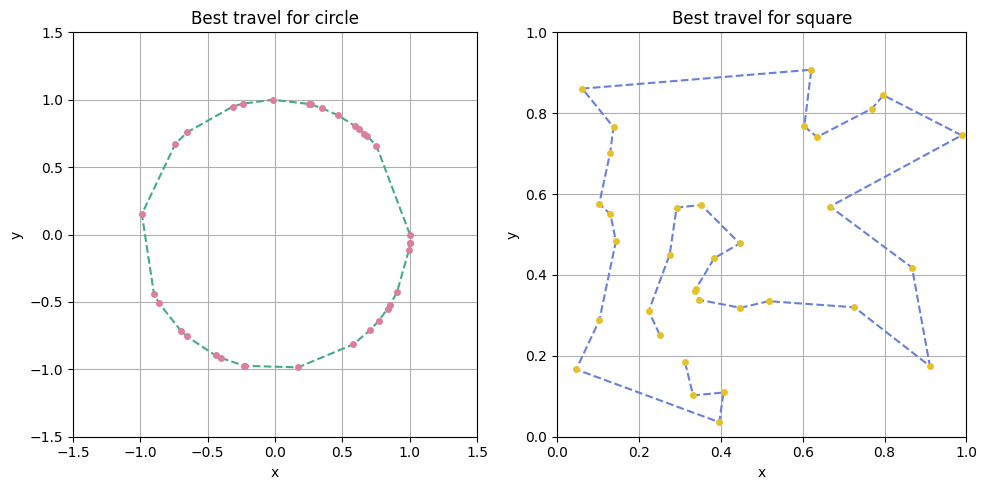

In [8]:
import numpy as np
import matplotlib.pyplot as plt

circle_data = np.loadtxt('data/circle_coord.dat')
square_data = np.loadtxt('data/square_coord.dat')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  

#plotting circle travel
ax[0].plot(circle_data[:, 0], circle_data[:, 1], 'o', markersize=4, linestyle='--', color='#43AA8B', markerfacecolor="#DC7F9B", markeredgecolor="#DC7F9B", label='Circle')
ax[0].set_xlim(-1.5, 1.5)
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Best travel for circle')
ax[0].set_aspect('equal', 'box')
ax[0].grid(True)

#plotting square travel
ax[1].plot(square_data[:, 0], square_data[:, 1], 'o', markersize=4, linestyle='--', color='#6A7FDB', markerfacecolor="#E6C229", markeredgecolor="#E6C229", label='Square')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Best travel for square')
ax[0].set_aspect('equal', 'box')
ax[1].grid(True)

plt.tight_layout()
plt.show()